In [1]:
import open3d as o3d
import numpy as np
from PyQt5.QtCore import right
from matplotlib import pyplot as plt
from scipy.ndimage import label

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
loaded_decimated_reference_mesh = o3d.io.read_triangle_mesh(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data\Basketball\reference_mesh/decimated_reference_mesh.obj', enable_post_processing=False)
print(loaded_decimated_reference_mesh)
subdivided_decimated_reference_mesh = o3d.geometry.TriangleMesh.subdivide_midpoint(loaded_decimated_reference_mesh, number_of_iterations=1)
print(subdivided_decimated_reference_mesh)
loaded_decimated_reference_mesh.compute_vertex_normals()
subdivided_decimated_reference_mesh.compute_vertex_normals()
fitting_mesh_dancer_i = o3d.io.read_triangle_mesh(fr'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\output\Basketball\reference/fitting_mesh_dancer_018.obj', enable_post_processing=False)
fitting_mesh_dancer_i.compute_vertex_normals()
print(fitting_mesh_dancer_i)
#o3d.visualization.draw_geometries([subdivided_decimated_reference_mesh, fitting_mesh_dancer_i])


vertices = np.array(subdivided_decimated_reference_mesh.vertices)
x_threshold = 0  # Adjust these thresholds based on your requirements
y_threshold = 0
z_threshold = -1

# Find vertices where x, y, or z is greater than the respective thresholds
selected_ids = [idx for idx in range(vertices.shape[0]) if 
                #vertices[idx, 0] > x_threshold or
                vertices[idx, 1] > y_threshold and
                vertices[idx, 2] < z_threshold]

not_selected_ids = [idx for idx in range(vertices.shape[0]) if 
                #vertices[idx, 1] > y_threshold and
                vertices[idx, 2] > -0.8]

# Create a point cloud from the selected vertices
selected_vertices = vertices[not_selected_ids]
selected_points_cloud = o3d.geometry.PointCloud()
selected_points_cloud.points = o3d.utility.Vector3dVector(selected_vertices)

# Visualize the mesh and the selected points together
o3d.visualization.draw_geometries([subdivided_decimated_reference_mesh, selected_points_cloud])


#loaded_decimated_reference_mesh_vertices

TriangleMesh with 4989 points and 10000 triangles.
TriangleMesh with 19988 points and 40000 triangles.
TriangleMesh with 11955 points and 40000 triangles.


In [3]:
displacement = np.loadtxt(fr'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\output\Basketball\reference/displacements_Basketball_018.txt')

In [4]:
selected_ids.__len__()

2957

In [5]:
not_selected_ids.__len__()

16677

In [6]:
dis_select = []
for i in range (selected_ids.__len__()):
    print(np.linalg.norm(displacement[selected_ids[i]]))
    dis_select.append(np.linalg.norm(displacement[selected_ids[i]]))

0.9403986203461807
0.9167106134980657
0.8715618007347499
0.8681206862464458
0.9461542099996173
0.8854109105020108
0.93067371582365
0.9130151111504125
0.791810817683113
0.7591785218906024
0.9278346700247841
0.8629788587213478
0.8957451361436466
0.869322131433452
0.8705141860992271
0.7582121679319055
0.9131383414625629
0.8421215307780701
0.7453893620786388
0.7253441855422845
0.8846275477080736
0.8838093105240519
0.8867033330968143
0.9092258249170004
0.9030283748592843
0.6361248977991665
0.5483761050592922
0.5645859837969767
0.5777609215756981
0.5747419293039268
0.5662673162032222
0.853193084477365
0.7184231066022305
0.7156605819101678
0.7502213618659495
0.8067387916172124
0.7653287642079056
0.8474926865224266
0.8234935512929048
0.8903599461032601
0.9323517188400523
0.8388970516243337
0.8390884896964086
0.7895896539975685
0.9643287099345326
0.8347452501985261
0.9147746419031302
0.877805060534513
0.6489910536363348
0.6381335735565086
0.6631956484326477
0.6406449832785706
0.6406762546715774

In [7]:
dis_not_select = []
for i in range (not_selected_ids.__len__()):
    print(np.linalg.norm(displacement[not_selected_ids[i]]))
    dis_not_select.append(np.linalg.norm(displacement[not_selected_ids[i]]))

0.9451445420675083
0.3968636249002924
0.3608336495131794
0.4078204457846614
0.40480521956121074
0.3700149982311528
0.3824574212327432
0.1604888902977399
0.3288769120278892
0.2403098573196697
0.2766203043180308
0.1576869484928921
0.20566352004183922
0.13283751213418593
0.23404058634561656
0.2768299281743215
0.2996716129532459
0.23456456749688348
0.28160484921428464
0.2516175123178035
0.25735938985201223
0.21219149653084593
0.26400676243043475
0.3139224773347713
0.28217596176853904
0.28867505666579507
0.3029634959429931
0.17111657550336848
0.17242056621238663
0.1459269159305438
0.19185164776201427
0.12668253099776622
0.251712198474766
0.21622775310537728
0.1892098053378841
0.21044691016976227
0.2176433572521799
0.2165802246859117
0.16752182632719834
0.20277787262174343
0.49023912475036097
0.5594969474304574
0.561977687301729
0.49682147806732346
0.22544488480335942
0.09022320253681977
0.3203984969627667
0.2477293204305861
0.2009849024926997
0.14792917332629152
0.257175752686757
0.20271061

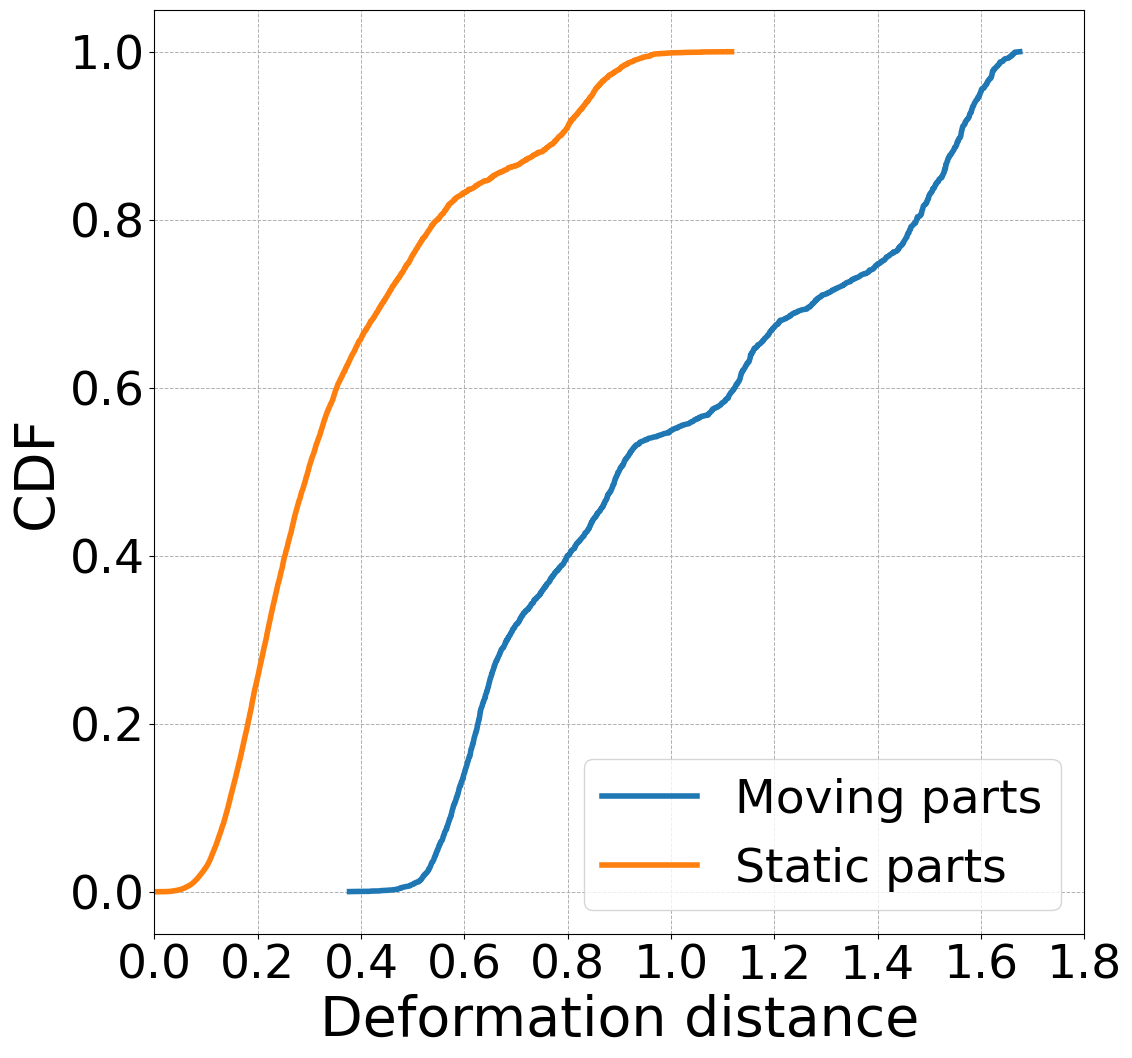

In [15]:
cumulative_select = np.linspace(0, 1, len(dis_select))

sorted_data_select = np.sort(dis_select)
sorted_data_not_select = np.sort(dis_not_select)

cumulative_data_select = np.cumsum(sorted_data_select) / np.sum(sorted_data_select)
cumulative_data_not_select = np.cumsum(sorted_data_not_select) / np.sum(sorted_data_not_select)

plt.figure(figsize=(12, 12))
plt.plot(sorted_data_select, cumulative_data_select, label="Moving parts", linewidth=4, color='#1f77b4')
plt.plot(sorted_data_not_select, cumulative_data_not_select, label="Static parts", linewidth=4, color='#ff7f0e')
plt.legend(fontsize=34, loc = 'lower right', frameon=True) 
plt.xlabel("Deformation distance", fontsize=40)
plt.ylabel("CDF", fontsize=40)
plt.xlim(left=0, right=1.8)
plt.ylim(top=1.05, bottom=-0.05)
x_min, x_max = plt.xlim()  
plt.xticks(np.arange(0, np.ceil(x_max) , 0.2), fontsize=34) 
plt.yticks(fontsize=34)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
#plt.title("Cumulative Distribution Function (CDF)")
plt.savefig(r"G:\PycharmProjects\Mesh_Editing\Results/cumulative_distribution_function_basketball.png", dpi=300, bbox_inches='tight')
plt.show()


In [16]:
loaded_decimated_reference_mesh = o3d.io.read_triangle_mesh(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data\Thomas\reference_mesh/decimated_reference_mesh.obj', enable_post_processing=False)
print(loaded_decimated_reference_mesh)
subdivided_decimated_reference_mesh = o3d.geometry.TriangleMesh.subdivide_midpoint(loaded_decimated_reference_mesh, number_of_iterations=1)
print(subdivided_decimated_reference_mesh)
loaded_decimated_reference_mesh.compute_vertex_normals()
subdivided_decimated_reference_mesh.compute_vertex_normals()
fitting_mesh_dancer_i = o3d.io.read_triangle_mesh(fr'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\output\Thomas\reference/fitting_mesh_Thomas_009.obj', enable_post_processing=False)
fitting_mesh_dancer_i.compute_vertex_normals()
print(fitting_mesh_dancer_i)
#o3d.visualization.draw_geometries([subdivided_decimated_reference_mesh, fitting_mesh_dancer_i])


vertices = np.array(subdivided_decimated_reference_mesh.vertices)
x_threshold = 0  # Adjust these thresholds based on your requirements
y_threshold = 1.5
z_threshold = 0.12

# Find vertices where x, y, or z is greater than the respective thresholds
selected_ids = [idx for idx in range(vertices.shape[0]) if 
                #vertices[idx, 0] > x_threshold or
                vertices[idx, 1] > y_threshold or
                vertices[idx, 2] > z_threshold]

not_selected_ids = [idx for idx in range(vertices.shape[0]) if not (
                #vertices[idx, 1] > y_threshold and
                vertices[idx, 1] > y_threshold or
                vertices[idx, 2] > z_threshold)]

# Create a point cloud from the selected vertices
selected_vertices = vertices[not_selected_ids]
selected_points_cloud = o3d.geometry.PointCloud()
selected_points_cloud.points = o3d.utility.Vector3dVector(selected_vertices)

# Visualize the mesh and the selected points together
o3d.visualization.draw_geometries([subdivided_decimated_reference_mesh, selected_points_cloud])


#loaded_decimated_reference_mesh_vertices

TriangleMesh with 4997 points and 10000 triangles.
TriangleMesh with 19997 points and 40000 triangles.
TriangleMesh with 11307 points and 40000 triangles.


In [17]:
displacement = np.loadtxt(fr'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\output\Thomas\reference/displacements_Thomas_009.txt')

In [18]:
dis_select = []
for i in range (selected_ids.__len__()):
    #print(np.linalg.norm(displacement[selected_ids[i]]))
    dis_select.append(np.linalg.norm(displacement[selected_ids[i]]))

dis_not_select = []
for i in range (not_selected_ids.__len__()):
    #print(np.linalg.norm(displacement[not_selected_ids[i]]))
    dis_not_select.append(np.linalg.norm(displacement[not_selected_ids[i]]))

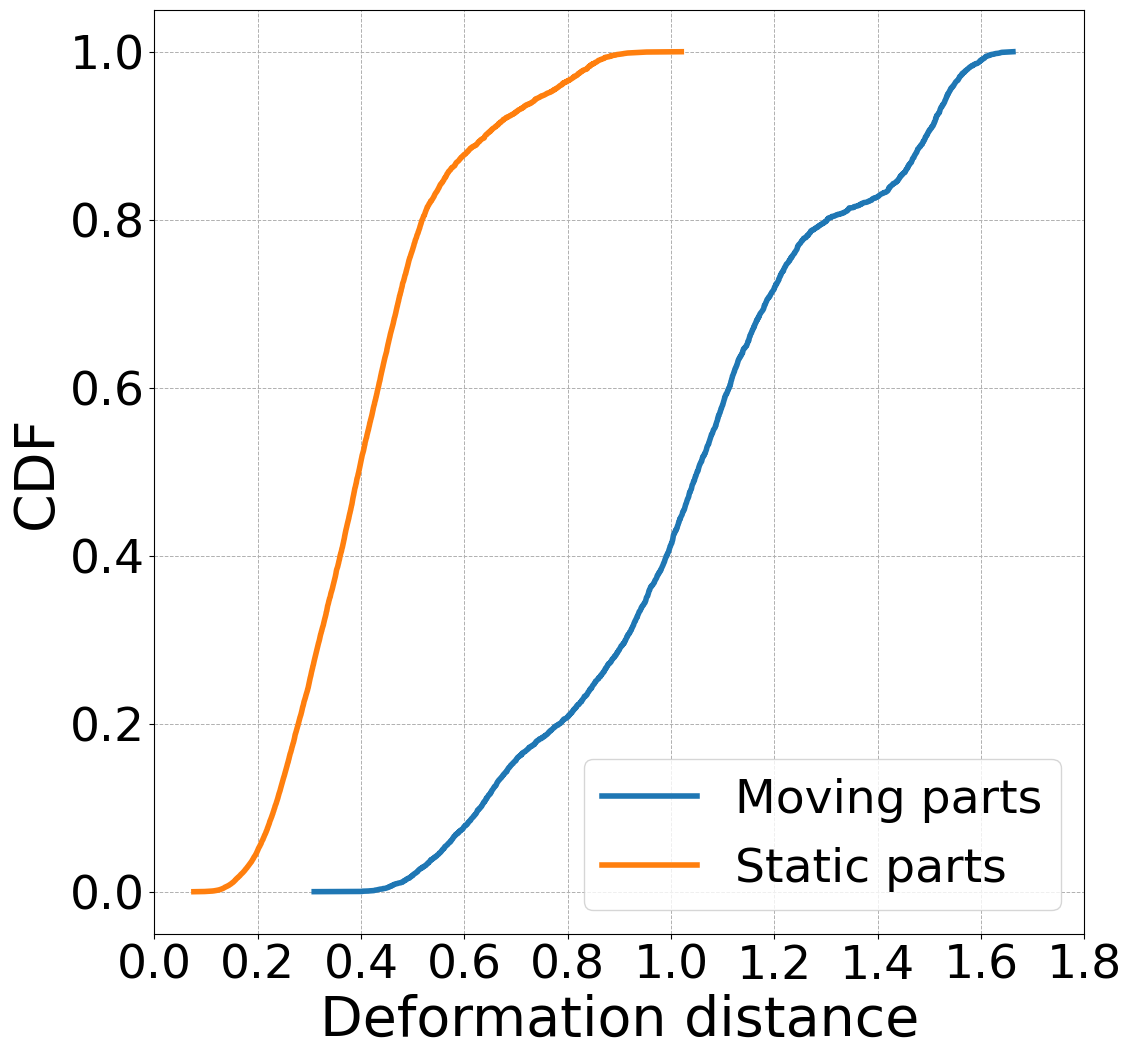

In [19]:
cumulative_select = np.linspace(0, 1, len(dis_select))

sorted_data_select = np.sort(dis_select) *10
sorted_data_not_select = np.sort(dis_not_select) *10

cumulative_data_select = np.cumsum(sorted_data_select) / np.sum(sorted_data_select)
cumulative_data_not_select = np.cumsum(sorted_data_not_select) / np.sum(sorted_data_not_select)

plt.figure(figsize=(12, 12))
plt.plot(sorted_data_select, cumulative_data_select, label="Moving parts", linewidth=4, color='#1f77b4')
plt.plot(sorted_data_not_select, cumulative_data_not_select, label="Static parts", linewidth=4, color='#ff7f0e')
plt.legend(fontsize=34, loc = 'lower right', frameon=True) 
plt.xlabel("Deformation distance", fontsize=40)
plt.ylabel("CDF", fontsize=40)
plt.xlim(left=0, right=1.8)
plt.ylim(top=1.05, bottom=-0.05)
x_min, x_max = plt.xlim()  
plt.xticks(fontsize=34) 
plt.yticks(fontsize=34)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
#plt.title("Cumulative Distribution Function (CDF)")
plt.savefig(r"G:\PycharmProjects\Mesh_Editing\Results/cumulative_distribution_function_Thomas.png", dpi=300, bbox_inches='tight')
plt.show()
